In [12]:
# time: 2023.07.27
# author: bio大恐龙

import pandas as pd
film_details_df = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/films_info.csv', encoding='gbk')
film_details_df['Rating_value'] = [float(i) for i in film_details_df['Rating_value']]
film_details_df['Year'] = [str(i) for i in film_details_df['Year']]

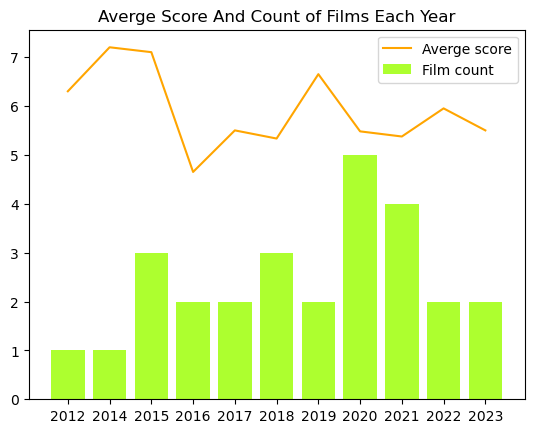

In [29]:
import matplotlib.pyplot as plt

year_analysis = film_details_df.groupby('Year').agg({'Rating_value':'mean', 'Film_name':'count'})

plt.bar(year_analysis.index, year_analysis['Film_name'], label='Film count', color='greenyellow')
plt.plot(year_analysis.index, year_analysis['Rating_value'], label='Averge score', color='orange')
# add legend
plt.legend()
# add title
plt.title('Averge Score And Count of Films Each Year')
# plt.savefig('/mnt/c/Users/ouyangkang/Desktop/damn.png')

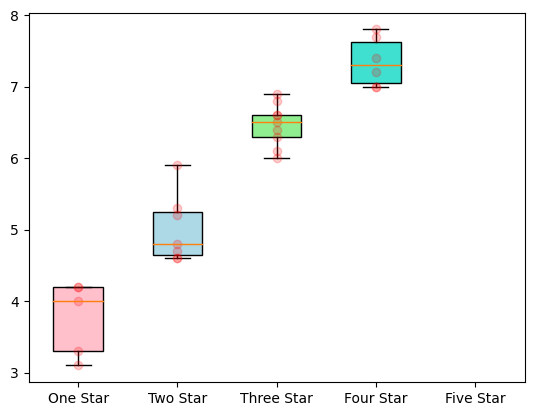

In [79]:
'''
五星档 8.5~10分
四星档 7~8.5分
三星档 6~7分
二星档 4.5~6分
一星档 2~4.5分
'''
def level_assignment(score):
    if score >= 8.5:
        return 'Five'
    elif score >= 7:
        return 'Four'
    elif score >= 6:
        return 'Three'
    elif score >= 4.5:
        return 'Two'
    else:
        return 'One'
film_details_df['Level'] = list(map(level_assignment, film_details_df['Rating_value'].tolist()))

# draw box figure
level_analysis = [film_details_df[film_details_df['Level'] == level]['Rating_value'].tolist() for level in ["One", "Two", "Three", "Four", "Five"]]

labels = ["One Star", "Two Star", "Three Star", "Four Star", "Five Star"]
colors = ['pink', 'lightblue', 'lightgreen', 'turquoise', 'mediumslateblue']

bplot = plt.boxplot(level_analysis, labels=labels, patch_artist=True, vert=True)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.plot([1]*len(film_details_df[film_details_df['Level'] == "One"]['Rating_value'].tolist()), film_details_df[film_details_df['Level'] == "One"]['Rating_value'].tolist(), 'ro', alpha=0.2)
plt.plot([2]*len(film_details_df[film_details_df['Level'] == "Two"]['Rating_value'].tolist()), film_details_df[film_details_df['Level'] == "Two"]['Rating_value'].tolist(), 'ro', alpha=0.2)
plt.plot([3]*len(film_details_df[film_details_df['Level'] == "Three"]['Rating_value'].tolist()), film_details_df[film_details_df['Level'] == "Three"]['Rating_value'].tolist(), 'ro', alpha=0.2)
plt.plot([4]*len(film_details_df[film_details_df['Level'] == "Four"]['Rating_value'].tolist()), film_details_df[film_details_df['Level'] == "Four"]['Rating_value'].tolist(), 'ro', alpha=0.2)

In [92]:
# data pre-procession
fit_data = film_details_df[['Rating_count', 'Rating_value', 'Interesting_count', 'Watched_count']]
fit_data['Rating_count'] = list(map(float, fit_data['Rating_count'].tolist()))
fit_data['Interesting_count'] = list(map(float, fit_data['Interesting_count'].tolist()))
fit_data['Watched_count'] = list(map(float, fit_data['Watched_count'].tolist()))
konwn_data = fit_data.dropna(subset=['Interesting_count', 'Watched_count'])
unkonwn_data = fit_data[fit_data.isna().any(axis=1)]

/tmp/ipykernel_15810/90157033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fit_data['Rating_count'] = list(map(float, fit_data['Rating_count'].tolist()))
/tmp/ipykernel_15810/90157033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fit_data['Interesting_count'] = list(map(float, fit_data['Interesting_count'].tolist()))
/tmp/ipykernel_15810/90157033.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
# correlation analysis

In [99]:
from sklearn import linear_model

# interesting count model
reg_interesting = linear_model.LinearRegression()
reg_interesting.fit(konwn_data[['Rating_count', 'Rating_value']], konwn_data['Interesting_count'])
reg_interesting.coef_


array([ 1.98864639e+00, -2.06935340e+04])

In [100]:
reg_interesting.predict(unkonwn_data[['Rating_count', 'Rating_value']])

array([534552.7517423 , 539697.36656694])